In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import hpe
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
# import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time 
import mediapipe
from mpl_toolkits.mplot3d import Axes3D
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [4]:
image_resolution = "ColumBianGaze"

In [5]:
##Load the Model 512
# model_U = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/u2net_multiclass_epoch_200_batch_2_with_dice_and_boundary_loss/Miche_model_2023_01_17_20:33:14_val_iou0.906.pt",map_location=device)

# model_U = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/u2net_multiclass_epoch_200_batch_2/Miche_model_2023_01_09_23:22:49_val_iou0.907.pt")

# # Load Model 256
model_U = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/U2NET_MULTICLASS_IMG_256_DIC_batch_8/Miche_model_2023_04_11_22:14:26_val_iou0.900.pt",map_location=device)
# 

# # Gan MOdel
# model_U = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/U2N2T_WITH_ESRGAN_bacth_8_epoch_300_with_diceLoss/Miche_model_2023_05_02_23:00:18_val_iou0.798.pt")
# model_U.to(device)


model_U.eval()


U2NET(
  (stage1): RSU7(
    (rebnconvin): REBNCONV(
      (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (rebnconv1): REBNCONV(
      (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv2): REBNCONV(
      (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv3): REBNCONV(
      (conv_s1): Conv2d(32, 32, k

In [6]:
resize_amt = 256

In [7]:
# Load the DeepLabV3Plus Model

# model_D = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/DeepLabV3Plus/Miche_Multiclass_Segemntation_DeepLabv3Plus_epoch_200_batch_4/Miche-0.907.pt")

In [8]:
# model_output= model_U(img_base)

In [9]:
saved_loaction = "Columbian_Gaze_256"

In [10]:
# img_path = "/home/nipun/Pictures/my_eye.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/BioID-FaceDatabase-V1.2/images/BioID_0063.pgm"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/004_09.png"
# img_path  = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/018_12.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/103_07.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/096_10.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/001_02.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/002_01.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/003_05.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/005_04.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/006_09.png"
# 
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/009_07.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/030_12.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/031_12.png"
# 
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/037_11.png"
# 

# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/043_01.png"


# img_path = "/home/nipun/Music/Real-ESRGAN/Image_Enhanced.png"


##

In [11]:
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/004_09.png"
# img_path  = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/018_12.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/103_07.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/096_10.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/001_02.png"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/002_02.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/003_05.png" ##
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/005_04.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/006_09.png"
# 
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/009_07.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/030_12.png"
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/031_12.png"
# 
# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/SuperResoultionDatasets/Gi4e/SRGAN/037_11.png"

# img_path = "/home/nipun/Pictures/Webcam/laptop_eye.jpg"

# img_path = "/home/nipun/Pictures/Webcam/gaze_right_dir.jpg"

# img_path = "/home/nipun/Pictures/Webcam/normal_eye.jpg"

# img_path = "/home/nipun/Pictures/Webcam/closed_eye.jpg"


# 
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/I2HEAD/user_01/17_points_Trans_Bwd/position_index_01/image_01/01.png"

# img_path = '/home/nipun/Pictures/Webcam/2023-07-24-123412.jpg'

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/MPIIGaze/Data/Original/p00/day01/0001.jpg"


# img_path = "/home/nipun/Pictures/Webcam/Extreme_Angles/Iphone/right.jpeg"

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/columbia_gaze_data_set/Columbia Gaze Data Set/0014/0014_2m_15P_10V_15H.jpg"

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/041_03.png"

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/I2Head/user_01/17_points_Trans_Fwd/position_index_02/image_01/01.png"


# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/I2HEAD/user_01/17_points_Trans_Bwd/position_index_09/image_01/01.png"

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/columbia_gaze_data_set/Columbia Gaze Data Set/0009/0009_2m_15P_-10V_-5H.jpg"

# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/columbia_gaze_data_set/ColumbiaGazeDataSet/0009/0009_2m_0P_-10V_15H.jpg"


img_path = "/home/nipun/Documents/Uni_Malta/Datasets/columbia_gaze_data_set/ColumbiaGazeDataSet/0042/0042_2m_0P_0V_10H.jpg"

In [12]:
folder_name = img_path.split("/")[-1].split(".")[0]

In [13]:
root_folder = saved_loaction+"/"+folder_name + "/"+image_resolution


if not os.path.exists(root_folder):
    os.makedirs(root_folder)
    
print(root_folder)

Columbian_Gaze_256/0042_2m_0P_0V_10H/ColumBianGaze


In [14]:
# ESRGAN INPUT.

In [15]:
EyeOnly = False

(3456, 5184, 3)


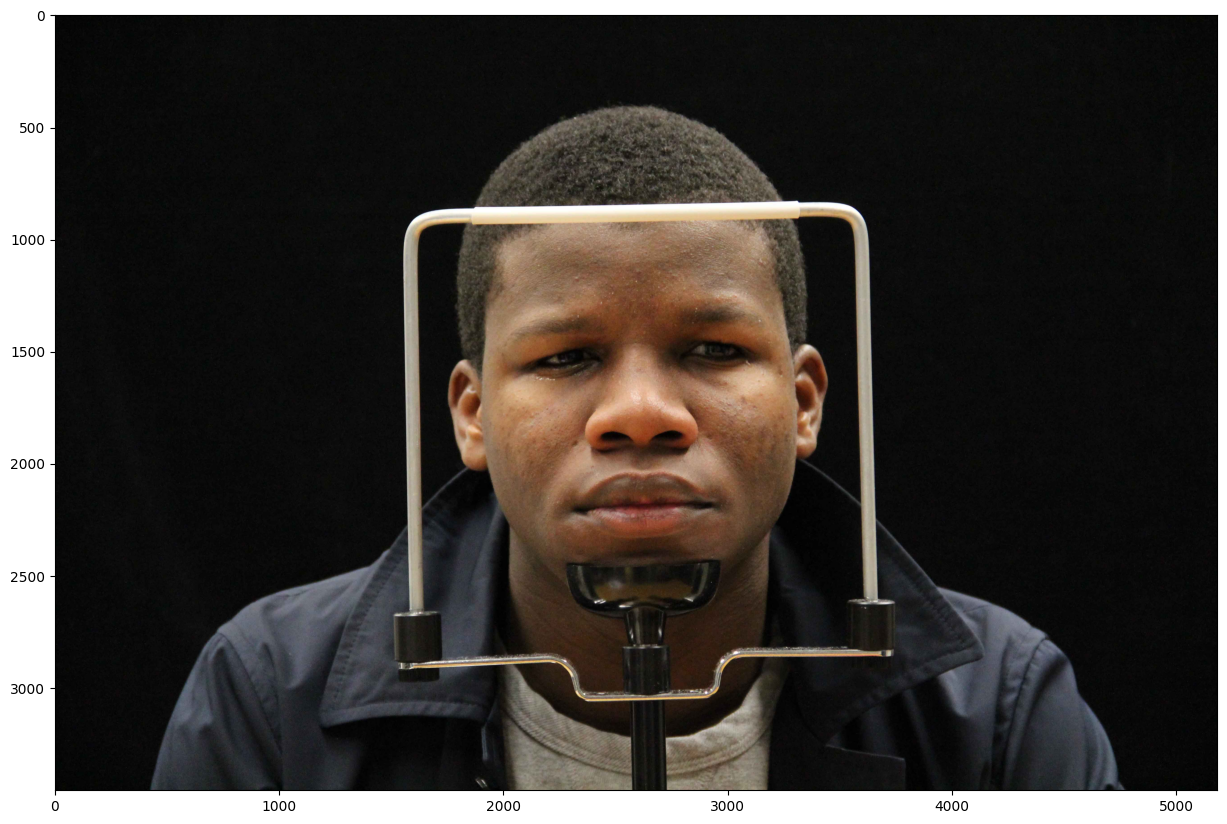

In [16]:
img_base= cv2.imread(img_path)

fig = plt.figure(figsize=(15,15))
print(img_base.shape)
plt.imshow(img_base[:,:,::-1],)

In [47]:
cv2.imwrite(os.path.join(root_folder,"Original_Image.png"),img_base)

True

In [17]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [18]:
results = face_mesh.process(img_base)

In [19]:
print(results.multi_face_landmarks)

[landmark {
  x: 0.506439208984375
  y: 0.6044166684150696
  z: -0.039338111877441406
}
landmark {
  x: 0.5062195062637329
  y: 0.5434774160385132
  z: -0.06382317841053009
}
landmark {
  x: 0.5058914422988892
  y: 0.5621448159217834
  z: -0.036819808185100555
}
landmark {
  x: 0.4949983060359955
  y: 0.49372443556785583
  z: -0.04296159744262695
}
landmark {
  x: 0.5061815977096558
  y: 0.5267325043678284
  z: -0.06635352969169617
}
landmark {
  x: 0.5060457587242126
  y: 0.505861222743988
  z: -0.05982965975999832
}
landmark {
  x: 0.5056867599487305
  y: 0.4566497504711151
  z: -0.02294147200882435
}
landmark {
  x: 0.421169251203537
  y: 0.476455956697464
  z: 0.025380481034517288
}
landmark {
  x: 0.5054903626441956
  y: 0.42279404401779175
  z: -0.010341477580368519
}
landmark {
  x: 0.5050997734069824
  y: 0.40356534719467163
  z: -0.009517651982605457
}
landmark {
  x: 0.5046828985214233
  y: 0.33808743953704834
  z: 0.012977201491594315
}
landmark {
  x: 0.5065616369247437
  y

In [20]:
landmarks = results.multi_face_landmarks[0]

In [21]:
img_1 = img_base.copy()
xs = [];ys = [];zs = []
for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    # z = landmark.z
    
    relative_x = int(x * img_base.shape[1])
    relative_y = int(y * img_base.shape[0])
    
    cv2.circle(img_1,(relative_x,relative_y),radius = 2,color=(0,255,0),thickness=5)

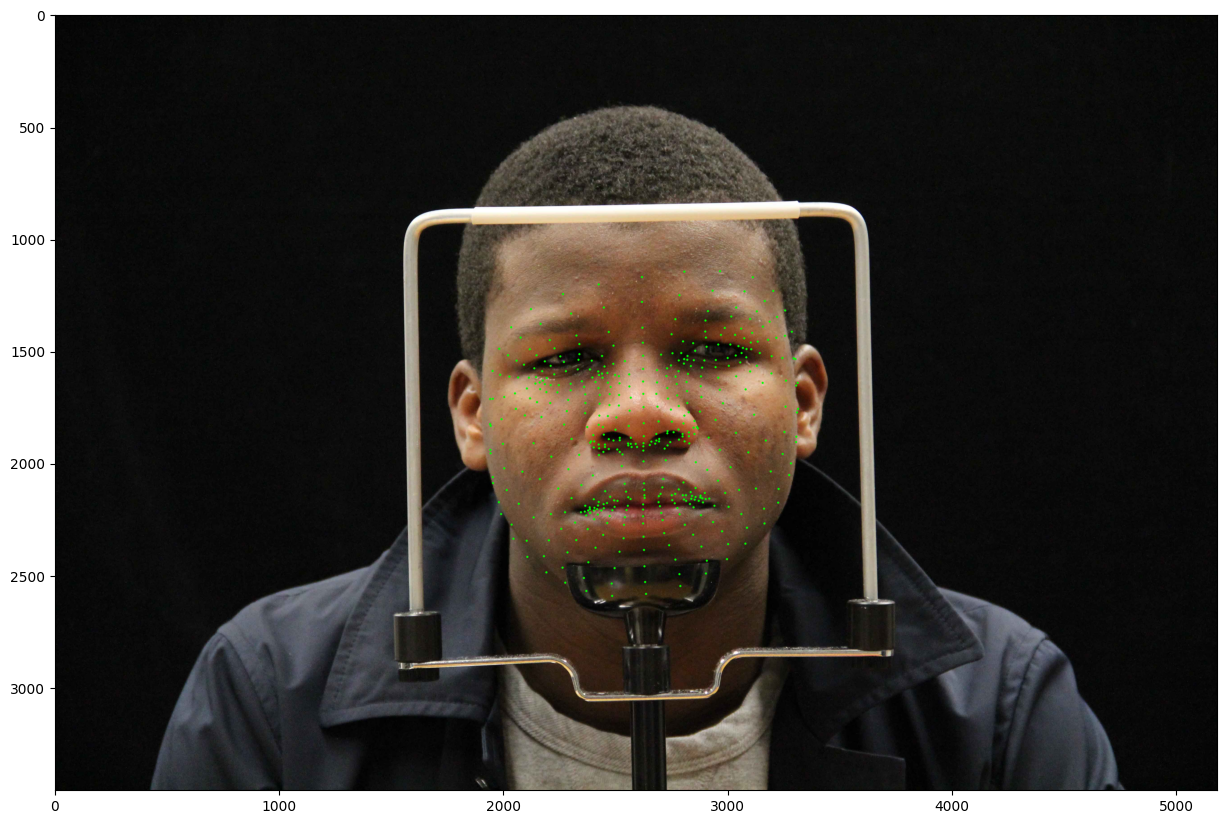

In [22]:
fig = plt.figure(figsize=(15,15))
plt.imshow(img_1[:,:,::-1])
plt.show()

In [23]:
img_2 = img_base.copy()
lEyeC = []
for source_idx,target_idx in  mp_face_mesh.FACEMESH_RIGHT_EYE:
    
    print(source_idx)
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img_base.shape[1]),int(source.y * img_base.shape[0]))
    relative_target = (int(target.x * img_base.shape[1]),int(target.y * img_base.shape[0]))
    
    
    
    lEyeC.append(relative_source)
    lEyeC.append(relative_target)
    
    cv2.circle(img_2,relative_source,radius = 2,color = 
               (0,0,255),thickness =-1)
    
    cv2.circle(img_2,relative_target,radius = 2,color = 
               (255,0,0),thickness =-1)

154
33
246
159
144
173
158
163
153
7
161
157
33
160
145
155


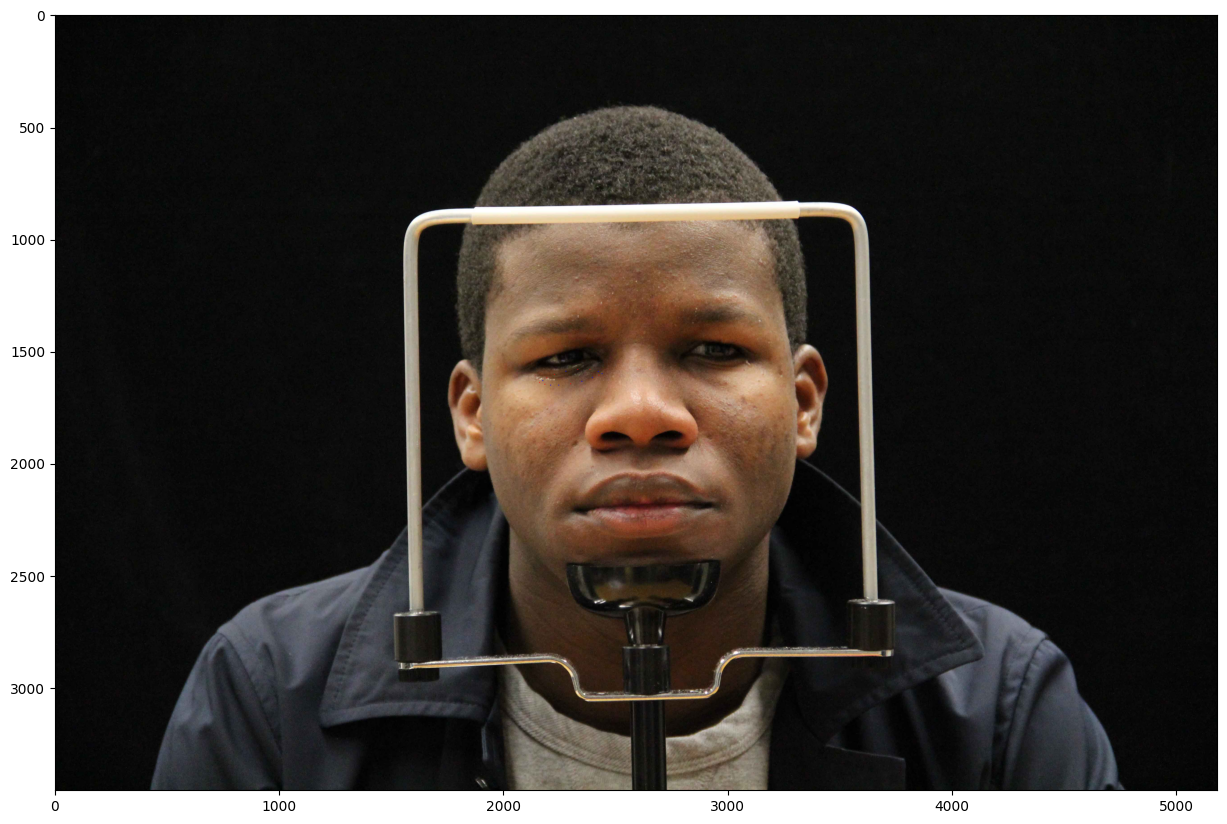

In [24]:
fig = plt.figure(figsize=(15,15))
plt.imshow(img_2[:,:,::-1])
plt.show()

In [25]:
def getLandMark_Coordinates(index,image):
    
    landmark_index = landmarks.landmark[index]
    
    return (int(landmark_index.x * image.shape[1]),int(landmark_index.y* image.shape[0]))

In [26]:
img_landmark = img_base.copy()

lEyeTopLeftCorner = getLandMark_Coordinates(70,img_base)

rEyeTopLeftCorner = getLandMark_Coordinates(285,img_base)

lEyeBottomRight = getLandMark_Coordinates(133,img_base)

rEyeBottomRight  = getLandMark_Coordinates(263,img_base)

In [27]:

cv2.circle(img_landmark,lEyeTopLeftCorner,2,(0,0,255),10)
cv2.circle(img_landmark,rEyeTopLeftCorner,2,(0,0,255),10)
cv2.circle(img_landmark,lEyeBottomRight,2,(0,0,255),10)
cv2.circle(img_landmark,rEyeBottomRight,2,(0,0,255),10)


array([[[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [3, 9, 8],
        [3, 9, 8],
        [3, 9, 8]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [3, 9, 8],
        [3, 9, 8],
        [3, 9, 8]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [3, 9, 8],
        [3, 9, 8],
        [3, 9, 8]],

       ...,

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]]], dtype=uint8)

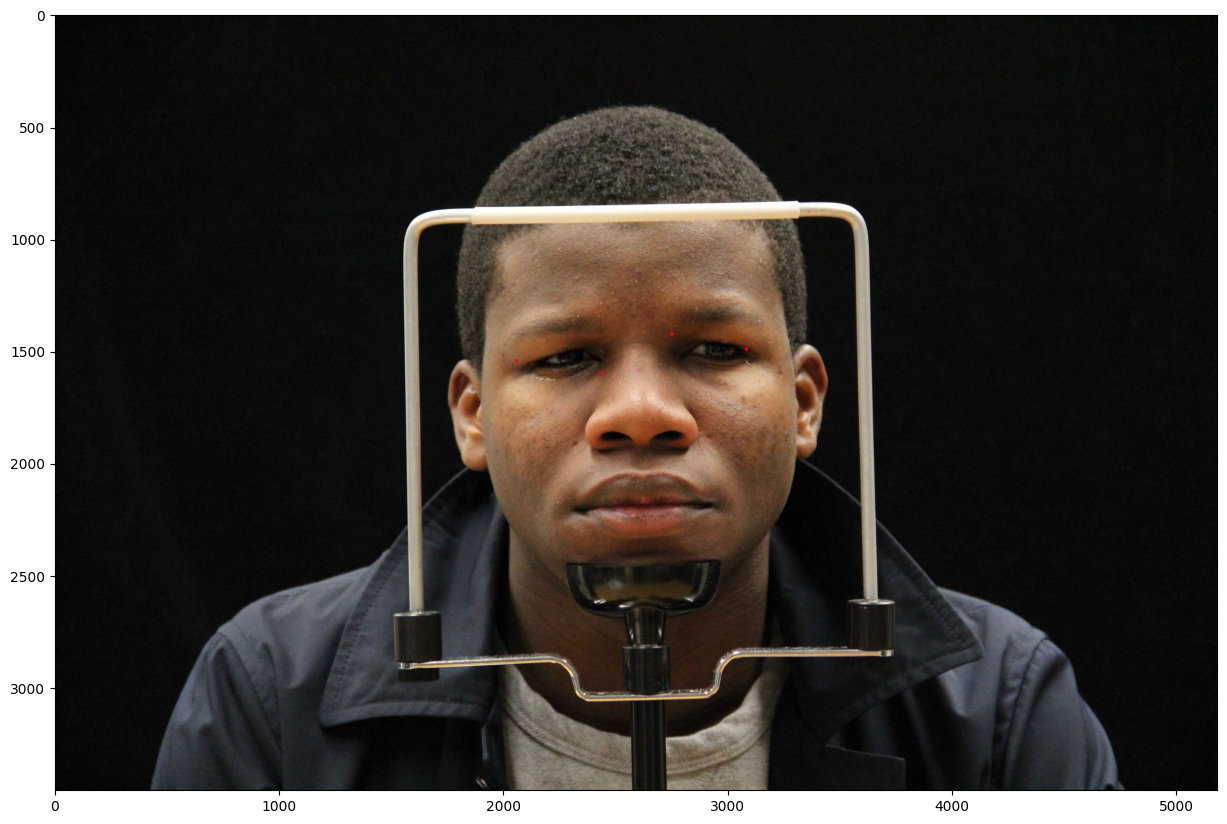

In [28]:
fig = plt.figure(figsize=(15,15))
plt.imshow(img_landmark[:,:,::-1])
plt.show()

In [29]:
ori_im = img_base.copy()

In [32]:
def captureFaceLandmarks(frame):

    results = face_mesh.process(frame)
    
    if results.multi_face_landmarks is not None:
        landmarks = results.multi_face_landmarks[0]

        shape_arr = []

        for landmark in landmarks.landmark:

            x = landmark.x
            y = landmark.y

            relative_x = int(x * frame.shape[1])
            relative_y = int(y * frame.shape[0])

            shape_arr.append([relative_x, relative_y])

        return np.array(shape_arr)
    else:
        return []

In [33]:
shape_array = captureFaceLandmarks(ori_im)

In [34]:
def cropped_image(img, shape_array, padded_amt=15, enhance=True):
    """Cropped eye region and enhance it according to the requirement

    Args:
        img (__numpy__): _Original Image_
        shape_array (_numpy_): _FaceLandMark locations_findRadiusIris(pred_mask,eye_w,eye_h,ori_cx,ori_cy,margin)
        padded_amt (int, optional): _padding size_. Defaults to 20.
        enhance (bool, optional): _applying SISR_. Defaults to True.
    """

    Leye = {"top_left": shape_array[70], "bottom_right": shape_array[133]}

    Reye = {"top_left": shape_array[285],
            "bottom_right": shape_array[263]}

    left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1] +
                   50, Leye["top_left"][0]+40:Leye["bottom_right"][0]]

    right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1] +
                    60, Reye["top_left"][0]:Reye["bottom_right"][0]]

    Leye["top_left"][0] += 40

    return left_eye, right_eye, Leye, Reye


Left Eye


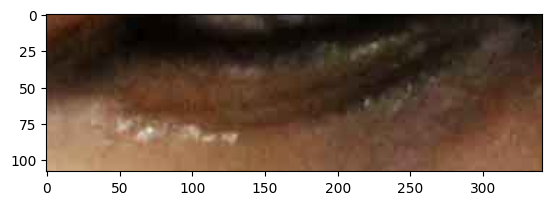

Right Eye


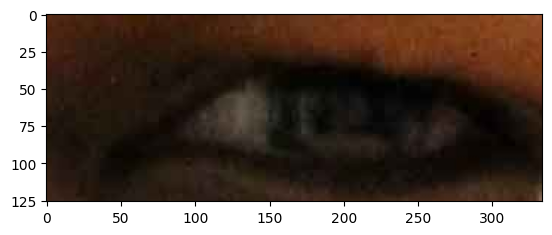

In [35]:
left_eye, right_eye, Leye, Reye = cropped_image(ori_im,shape_array)

print("Left Eye")
plt.imshow(left_eye[:,:,::-1])
plt.show()


print("Right Eye")
plt.imshow(right_eye[:,:,::-1])
plt.show()

In [67]:
# left_eye = ori_im[lEyeTopLeftCorner[1]:lEyeBottomRight[1]+50,lEyeTopLeftCorner[0]:lEyeBottomRight[0]]


# cv2.imwrite(os.path.join(root_folder,"Original_left_eye.png"),left_eye)
# # left_eye_img = cv2.cvtColor(left_eye,cv2.COLOR_BGR2RGB)


# left_gan_eye,_ = upsampler.enhance(left_eye, outscale=2)





# cv2.imwrite(os.path.join(root_folder,"Original_left_eye_with_gan.png"),left_gan_eye)

# left_gan_eye= cv2.cvtColor(left_gan_eye,cv2.COLOR_BGR2RGB)


# # OPtional
# left_eye = cv2.imread("/home/nipun/Pictures/eye_check.png")

# left_eye_img = cv2.cvtColor(left_eye,cv2.COLOR_BGR2RGB)
# cv2.imwrite(os.path.join(root_folder,"Original_left_eye.png"),left_eye_img)


In [68]:
# plt.imshow(left_eye_img)

In [69]:
# right_eye = ori_im[rEyeTopLeftCorner[1]:rEyeBottomRight[1]+50,rEyeTopLeftCorner[0]:rEyeBottomRight[0]]


# cv2.imwrite(os.path.join(root_folder,"Original_right_eye.png"),right_eye)

# # right_gan_eye,_ = upsampler.enhance(right_eye, outscale=2)


# # cv2.imwrite(os.path.join(root_folder,"Original_right_eye_with_gan.png"),right_gan_eye)



# # right_gan_eye = cv2.cvtColor(right_gan_eye,cv2.COLOR_BGR2RGB)

# right_eye_img = cv2.cvtColor(right_eye,cv2.COLOR_BGR2RGB)

In [70]:
# %matplotlib inline
# plt.imshow(right_eye[:,:,::-1])

# print(right_eye.shape)

In [71]:
# Yolo Model

yolo_model_path = "/home/nipun/Music/yolov5/runs/train/exp8/weights/best.pt"
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=yolo_model_path, force_reload=True)

model_yolo.conf = 0.40


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/nipun/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-4 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 


In [36]:
cropped_u2net_path = "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/YoloCroppedIris_u2net_epoch_500_batch_8_diceloss/Miche_model_2023_08_20_17:41:49_val_iou0.887.pt"


croppedU2netModel = torch.load(cropped_u2net_path,map_location=device)

croppedU2netModel.eval()

U2NET(
  (stage1): RSU7(
    (rebnconvin): REBNCONV(
      (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (rebnconv1): REBNCONV(
      (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv2): REBNCONV(
      (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv3): REBNCONV(
      (conv_s1): Conv2d(32, 32, k

In [37]:
def predictionOnCroppedImages(model_y,model_U,image):
    
    pad_top_x1 = 50
    pad_bottom_y2 = 65
    pad_top_left_y1 = 30
    pad_bottom_right_x2 = 15
    
    results = model_y(image, size=640)

    df = results.pandas().xyxy[0]

    # Get the all BBOX related to Iris Class which is zero
    df = df[df["class"] == 0]

    df = df[df['confidence'] == df['confidence'].max()]
    
    

    for (i, row) in df.iterrows():

        x1 = round(row["xmin"])
        y1 = round(row["ymin"])
        x2 = round(row["xmax"])
        y2 = round(row["ymax"])
    print(x1, y1, x2, y2)

    imageCopy = image.copy()

    cv2.rectangle(imageCopy,(x1,y1),(x2,y2),(0,255,0),1)
    plt.imshow(imageCopy[:,:,::-1])
    plt.show()


    if (y1 - pad_top_left_y1) < 0:
                pad_top_left_y1 = y1

    if (x1-pad_top_x1) < 0:
        pad_top_x1 = x1

    
    # cropped_img = image[y1:y2, x1:x2]
    cropped_img = image[y1-pad_top_left_y1:y2 +
                            pad_bottom_y2, x1-pad_top_x1:x2+pad_bottom_right_x2]

    plt.imshow(cropped_img[:,:,::-1])
    plt.show()
    
    
    croppedTrImg =  imgTransform(cropped_img[:,:,::-1])
    
    
    

    return predict_image_masku2net(model_U,croppedTrImg ),cropped_img
    
    

In [40]:
leftCroppedEye,crLeftEye = predictionOnCroppedImages(model_U ,croppedU2netModel,left_eye)

rightCroppedEye,crRightEye = predictionOnCroppedImages(model_U ,croppedU2netModel,right_eye)


TypeError: U2NET.forward() got an unexpected keyword argument 'size'

In [ ]:
%matplotlib inline

In [39]:

plt.imshow(leftCroppedEye)
plt.show()


cr_left_eye_boundary = draw_contours(leftCroppedEye,crLeftEye )

cv2.imwrite(os.path.join(root_folder,"left_eye_cropped_boundary.png"),cr_left_eye_boundary )

NameError: name 'leftCroppedEye' is not defined

In [ ]:
plt.imshow(rightCroppedEye)
plt.show()

cr_right_eye_boundary = draw_contours(rightCroppedEye,crRightEye)

cv2.imwrite(os.path.join(root_folder,"right_eye_cropped_boundary.png"),cr_right_eye_boundary  )

In [ ]:
print(right_eye_img.shape)
plt.imshow(right_eye_img)

In [29]:
def imgTransform(image,resize_amt=resize_amt):
    
    transform = A.Compose([
    A.Resize(resize_amt ,resize_amt ),
    A.augmentations.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])
    
    img = transform(image=image)["image"]
    
    return img

    

In [30]:
### Eye Region WIthough Gan Enhancement
l_img = imgTransform(left_eye[:,:,::-1])
r_img = imgTransform(right_eye[:,:,::-1])


# ### Eye Region WIth Gan Enhancement
# l_img_gan = imgTransform(left_gan_eye)
# r_img_gan = imgTransform(right_gan_eye)


In [31]:
def predict_image_masku2net(model,image):
    model.eval()
    

    image = image.to(device)
    
    
    
    # print(f"Original Image shape: {image.size()}")
    
    # print(f"Ground Truth Mask shape: {mask.size()}")
    
    with torch.no_grad():
        
        softmax = nn.Softmax(dim=1)
        image = image.unsqueeze(0)
        # mask = mask.unsqueeze(0)
        
        model_output,_,_,_,_,_,_ = model(image)
        
        
        output = softmax(model_output)
    
        
        masked = torch.argmax(output,dim=1)
        masked = masked.cpu().squeeze(0)
    return masked

In [32]:
# pred_mask_l = predict_image_masku2net(model_U,l_img_gan)

# pred_mask_r = predict_image_masku2net(model_U,r_img_gan)

In [33]:
#plt.imshow(pred_mask_l)

In [34]:
#plt.imshow(pred_mask_r)

In [35]:

def draw_contours(image_tensor,orginal_eye):
        
        

        image = image_tensor.detach().cpu().numpy().astype(np.uint8)
        
        edge_detected_image = cv2.Canny(image , 0, 1)
        
        
        contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        eye = cv2.resize(orginal_eye,(resize_amt,resize_amt))
        
        for pred_cnt in contours:
                cv2.drawContours(eye, [pred_cnt],  -1, (0,255,0), 1)
                
        return eye
    


In [36]:
# left_eye_boundary = draw_contours(pred_mask_l,left_gan_eye)

# cv2.imwrite(os.path.join(root_folder,"left_eye_gan_boundary.png"),left_eye_boundary )


In [37]:
# right_eye_boundary = draw_contours(pred_mask_r,right_gan_eye)

# cv2.imwrite(os.path.join(root_folder,"right_eye_gan_boundary.png"),right_eye_boundary )


In [38]:
pred_mask_l = predict_image_masku2net(model_U,l_img)

pred_mask_r = predict_image_masku2net(model_U,r_img)

/home/nipun/.local/lib/python3.10/site-packages/torch/nn/functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


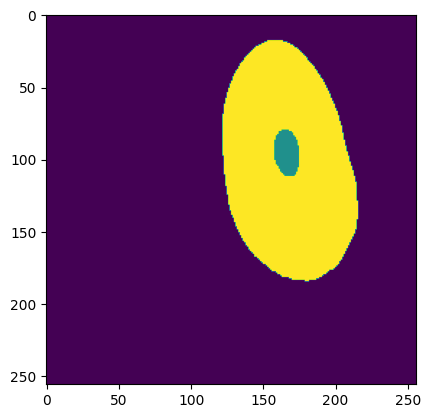

In [39]:
plt.imshow(pred_mask_l)

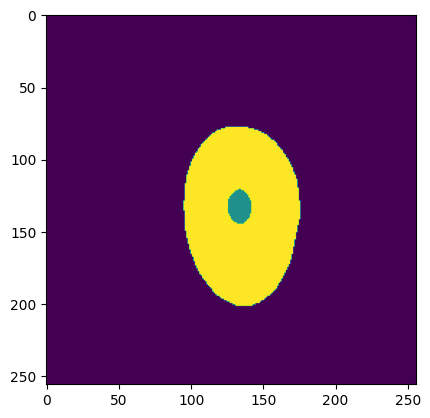

In [40]:
plt.imshow(pred_mask_r)

In [ ]:
# left_eye_boundary = draw_contours(pred_mask_l,left_eye_img)

# cv2.imwrite(os.path.join(root_folder,"left_eye_boundary.png"),left_eye_boundary[:,:,::-1])

In [ ]:
# right_eye_boundary = draw_contours(pred_mask_r,right_eye_img)

# cv2.imwrite(os.path.join(root_folder,"right_eye_boundary.png"),right_eye_boundary[:,:,::-1]  )

In [ ]:

def findRadiusIrisImageMoments(pred_mask, eye_w, eye_h,margin):
    
    RESIZE_AMT_SEGMENTATION = 256

    pred_image = decode_segmap(pred_mask) * 255
    pred_image = pred_image.astype(np.uint8)
    edge_detected_image = cv2.Canny(pred_image, 0, 200)


    plt.imshow(edge_detected_image)
    plt.show()
    contours, hierarchy = cv2.findContours(
        edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    area_dic = {}
    for cnt in contours:
        
        area  = cv2.contourArea(cnt)
        
        
        if area >30:
        
        
            area_dic[area] = cnt
        
    
    sorted_area = sorted(area_dic)
    
    pupil = area_dic[sorted_area[1]]
    
    
    # print(pupil
    
    
    # print(type(pupil))
    # print(type(min(contours, key=cv2.contourArea)))
    
    # print(sorted_area)
    # finding contour with #maximum area
    # pupil = min(contours, key=cv2.contourArea)
    M = cv2.moments(pupil)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    ori_cx = int(margin["top_left"][0] +((cx/RESIZE_AMT_SEGMENTATION ) * eye_w))
    ori_cy = int(margin["top_left"][1] + ((cy/RESIZE_AMT_SEGMENTATION) * eye_h))

    # print(ori_cx,ori_cy)

    iris = area_dic[sorted_area[-2]]
    # iris = max(contours, key=cv2.contourArea)
    minValOfIris = findMinEyeX(iris)

    minValOfIris = margin["top_left"][0] + \
        ((minValOfIris/RESIZE_AMT_SEGMENTATION) * eye_w)

    radius_of_iris = ori_cx-minValOfIris

    eyeBallRadius = (12.2/5.9) * radius_of_iris

    return eyeBallRadius, ori_cx, ori_cy, radius_of_iris


In [ ]:
def findMinEyeX(cntour):
    
    minVal = cntour[0][0][0]
    for i in cntour:
        if i[0][0] < minVal:
            minVal = i[0][0]

    return minVal

In [ ]:
def decode_segmap(temp, n_classes=3):

    colors = [[0,   0,   0], [0, 255, 0], [0, 0, 255]]
    label_colours = dict(zip(range(n_classes), colors))
    # convert gray scale to color
    temp = temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [ ]:
l_rad_iris, l_cx, l_cy, rl_iris = findRadiusIrisImageMoments(
        pred_mask=pred_mask_l, eye_w=left_eye.shape[1], eye_h=left_eye.shape[0], margin=Leye)

In [ ]:
r_rad_iris, r_cx, r_cy, rr_iris = findRadiusIrisImageMoments(
        pred_mask=pred_mask_r, eye_w=right_eye.shape[1], eye_h=right_eye.shape[0], margin=Reye)


In [ ]:
print(l_rad_iris)
print(r_rad_iris)

In [ ]:
cv2.circle(ori_im,(l_cx,l_cy),5,(0,255,0),-1)
cv2.circle(ori_im,(r_cx,r_cy),5,(0,255,0),-1)

plt.figure(figsize=(15,15))
plt.imshow(ori_im[:,:,::-1])





# Yolo Prediction

In [ ]:
import cv2
import numpy as np
import os
import torch
import warnings

from PIL import  Image
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")


In [ ]:

model_path = "/home/nipun/Music/yolov5/runs/train/exp8/weights/best.pt"

model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)


In [ ]:
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/val_img/001_IP5_OU_R_RI_01_2.jpg"

# img = Image.open(img_path)
img = cv2.imread(img_path)

pred_img = img[:,:,::-1]




In [ ]:
# pred_img.shape

In [ ]:
# # Inference
results = model([pred_img], size=640)


In [ ]:
results.pandas().xyxy[0]

In [ ]:
iris_bbox = results.xyxy[0][0].detach().cpu().tolist()

In [ ]:
x1,y1,x2,y2,_,_ = iris_bbox

In [ ]:
cv2.rectangle(img,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),1)



In [ ]:
cv2.imwrite("x.png",img)

# Real ESR Gan Eye

In [ ]:
import argparse
import cv2
import glob
import os
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url

from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact

from matplotlib import  pyplot as plt

In [ ]:
model_path = "/home/nipun/Music/Real-ESRGAN/experiments/net_g_latest.pth"
dni_weight = None
tile  = 0
tile_pad = 10
pre_pad = 0
fp32 = True
gpu_id = 0
netscale = 2

In [ ]:
model = SRVGGNetCompact(num_in_ch=3, num_out_ch=3, num_feat=64, num_conv=16, upscale=2, act_type='prelu')



In [ ]:
upsampler = RealESRGANer(
    scale=netscale,
    model_path=model_path,
    dni_weight=dni_weight,
    model=model,
    tile=tile,
    tile_pad=tile_pad,
    pre_pad=pre_pad,
    half=not fp32,
    gpu_id=gpu_id)

In [ ]:
img_path = "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-MainPipeLine/CenterEyeDatasets/004_02_left.png"


img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

In [ ]:
output, _ = upsampler.enhance(img, outscale=2)

In [ ]:
plt.imshow(output[:,:,::-1])

In [ ]:
def main(visualize_iris=True,enhance=True):
    
    
    vid = cv2.VideoCapture(0)
    
    frameCounter = 0
    
    while True:

        ret, frame = vid.read()
        
        
        
        # MediaPipe
        shape_array = captureFaceLandmarks(frame)
        
        meanWidth, symmAxis_x, piyot_y, R = calculateParameters(shape_array)
        
        
        left_eye, right_eye,Leye,Reye = cropped_image(frame, shape_array,enhance=False)
        
        
        
        
        
        # Prediction from the model for both eyes
        pred_l_eye,pred_r_eye = predict_image_masku2net(IRIS_MODEL,left_eye),predict_image_masku2net(IRIS_MODEL, right_eye)
        
        print(f"Right Eye shape:- {right_eye.shape}")
        print(f"Left Eye shape:- {left_eye.shape}")
        
        
        if visualize_iris:
                
                
            
                try:
                    frame = drawContours(frame,pred_l_eye,h=left_eye.shape[0]/2 if enhance else left_eye.shape[0],w=left_eye.shape[1]/2 if enhance else left_eye.shape[1],margin=Leye)
                    frame = drawContours(frame,pred_r_eye,h=right_eye.shape[0]/2 if enhance else right_eye.shape[0],w=(right_eye.shape[1]/2) if enhance else right_eye.shape[1],margin=Reye)
                except IndexError:
                    pass
        
        r = hpe.compute_rotation(shape_array)
        
        theta, phi, roll, yaw_deg, pitch_deg, roll_deg = hpe.compute_angles(r, frameCounter)
            
        
        
        
        
            
        
        
            
        # Inner Iris X and Y coordinate of Right eye
        innerEyeCorner_right_x = shape_array[362][0]
        innerEyeCorner_right_y = shape_array[362][1]

        # Outer Iris X and Y coordinate of Right eye
        outerEyeCorner_right_x = shape_array[263][0]
        outerEyeCorner_right_y = shape_array[263][1]

        # Inner Iris X and Y coordinate of Left eye
        innerEyeCorner_left_x = shape_array[133][0]
        innerEyeCorner_left_y = shape_array[133][1]

        # Outer Iris X and Y coordinate of Left eye
        outerEyeCorner_left_x = shape_array[33][0]
        outerEyeCorner_left_y = shape_array[33][1]
    
    
    
        innerEyeCornerRot_right_x = cornerX(innerEyeCorner_x=innerEyeCorner_right_x, symmAxis_x=symmAxis_x, R=R, theta=theta)
        innerEyeCornerRot_right_y = cornerY(innerEyeCorner_y=innerEyeCorner_right_y, pivot_y=piyot_y, phi=phi)

        innerEyeCornerRot_left_x = cornerX(innerEyeCorner_x=innerEyeCorner_left_x, symmAxis_x=symmAxis_x, R=R, theta=theta)
        innerEyeCornerRot_left_y = cornerY(innerEyeCorner_y=innerEyeCorner_left_y, pivot_y=piyot_y, phi=phi)
        
        
        
        l_rad_iris,l_cx,l_cy=findRadiusIris(pred_l_eye,eye_w=left_eye.shape[1],eye_h=left_eye.shape[0],margin=Leye)
        r_rad_iris,r_cx,r_cy=findRadiusIris(pred_r_eye,eye_w=right_eye.shape[1],eye_h=right_eye.shape[0],margin=Reye)
        
    
        print(f"Left Eye Radius: {l_rad_iris}")
        
        print(f"Right Eye Radius: {r_rad_iris}")
            
        # Fixed Eye Radius for Initial Stage
        
        l_rad_iris = 10
        r_rad_iris = 10
        
        # # Rotation For Right Eye
        irisRot_right_x = irisX(innerEyeCorner_x=innerEyeCorner_right_x, outerEyeCorner_x=outerEyeCorner_right_x, 
                                symmAxis_x=symmAxis_x, r=r_rad_iris, R=R, iris_x=r_cx, theta=theta)
        
        irisRot_right_y = irisY(innerEyeCorner_y=innerEyeCorner_right_y, outerEyeCorner_y=outerEyeCorner_right_y, 
                                pivot_y=piyot_y, r=r_rad_iris, iris_y=r_cy, phi=phi)
    
    
    
        # Rotation for Left Eye

        irisRot_left_x = irisX(innerEyeCorner_x=innerEyeCorner_left_x, outerEyeCorner_x=outerEyeCorner_left_x,
                            symmAxis_x=symmAxis_x, r=l_rad_iris, R=R, iris_x=l_cx, theta=theta)

        irisRot_left_y = irisY(innerEyeCorner_y=innerEyeCorner_left_y, outerEyeCorner_y=outerEyeCorner_left_y, 
                            pivot_y=piyot_y, r=l_rad_iris, iris_y=l_cy, phi=phi)
        
        frameCounter += 1
        print(frameCounter)
        
        cv2.imshow("Frame", frame)
        
        
        left_eye = cv2.resize(left_eye,(512,512))
        right_eye = cv2.resize(right_eye,(512,512))
        cv2.imshow("Right Eye",right_eye)
        cv2.imshow("Left Eye",left_eye)
        

        if cv2.waitKey(1) and 0xFF == ord('q') or frameCounter ==100:
            break
        
    vid.release()
    cv2.destroyAllWindows()